# 1. 이미지 확인

In [1]:
import tensorflow as tf
import numpy as np
from sklearn.model_selection import train_test_split

print(tf.__version__)
print(np.__version__)

2.6.0
1.22.2


In [2]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array

### 이미지 파일 압축풀기

- 원하는 디렉토리로 이동 =3

$ cd  ~/aiffel/rock_scissor_paper/rock

- 압축 해제 명령어 : unzip <파일명>.zip

$ unzip rock.zip

- 가위, 보에 대해서도 똑같이 실행!
$ cd  ~/aiffel/rock_scissor_paper/scissor

$ unzip scissor.zip

$ cd  ~/aiffel/rock_scissor_paper/paper

$ unzip paper.zip

In [3]:
# 이미지 파일 경로
image_path = 'paper/0.jpg'

# 이미지 불러오기
img = load_img(image_path)

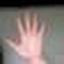

In [4]:
img

In [5]:
type(img)

PIL.JpegImagePlugin.JpegImageFile

In [6]:
# 이미지를 배열로 변환
img_array = img_to_array(img)
img_array.shape

(64, 64, 3)

# 2. 데이터 불러오기 + Resize 하기

In [7]:
from PIL import Image 
import glob
import os

print("PIL 라이브러리 import 완료!")

PIL 라이브러리 import 완료!


### 가위 이미지 변환

In [8]:
# 이미지 전처리 함수 정의. 224*224 -> 28*28 변환 후 저장
def resize_images(img_path):
	images=glob.glob(img_path + "/*.jpg")  
    
	print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
	target_size=(64,64)
	for img in images:
		old_img=Image.open(img)
		new_img=old_img.resize(target_size,Image.ANTIALIAS)
		new_img.save(img, "JPEG")
    
	print(len(images), " images resized.")
	

### ㄴ 변환 size를 64x64로 변경!

In [9]:
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서 변환
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/scissor"
resize_images(image_dir_path)

print("가위 이미지 resize 완료!")

1067  images to be resized.
1067  images resized.
가위 이미지 resize 완료!


### 보자기 이미지 변환

In [10]:
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/paper"
resize_images(image_dir_path)
print("보자기 이미지 resize 완료!")

1224  images to be resized.
1224  images resized.
보자기 이미지 resize 완료!


In [11]:
image_path = 'paper/0.jpg'
img = load_img(image_path)
print(type(img))

<class 'PIL.JpegImagePlugin.JpegImageFile'>


In [12]:
img_array = img_to_array(img)
img_array.shape

(64, 64, 3)

## ㄴ Wow!!
(224, 224, 3) shape이 (28, 28, 3) 으로 변환된 후 저장이 되었다!

### 바위 이미지 변환

In [13]:
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/rock"
resize_images(image_dir_path)

1251  images to be resized.
1251  images resized.


In [14]:
1251+1224+1067

3542

## load_data 함수 정의

In [15]:
import numpy as np

def load_data(img_path, number_of_data=300):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=64
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper"
(x_train, y_train)=load_data(image_dir_path, number_of_data=3542)
x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

학습데이터(x_train)의 이미지 개수는 3542 입니다.
x_train shape: (3542, 64, 64, 3)
y_train shape: (3542,)


라벨:  0


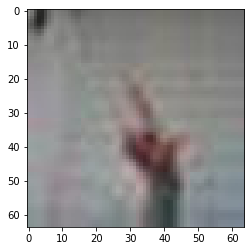

In [16]:
import matplotlib.pyplot as plt

plt.imshow(x_train[0])
print('라벨: ', y_train[0])

# 3. 모델 설계

In [17]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

# model을 직접 만들어 보세요.
# Hint! model의 입력/출력부에 특히 유의해 주세요. 가위바위보 데이터셋은 MNIST 데이터셋과 어떤 점이 달라졌나요?

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(64,64,3)))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(64, (3,3), activation='relu'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Conv2D(32, (3,3), activation='relu'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(3, activation='softmax'))
'''
model = keras.models.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 3)),
    keras.layers.MaxPooling2D(2, 2),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D(2, 2),
    keras.layers.Conv2D(128, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D(2, 2),
    
    keras.layers.Flatten(),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(3, activation='softmax')
])
'''
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 32)        896       
_________________________________________________________________
dropout (Dropout)            (None, 62, 62, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 29, 29, 64)        18496     
_________________________________________________________________
dropout_1 (Dropout)          (None, 29, 29, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 32)        1

# 4. 모델 학습

In [18]:
# train, validation 나누기
x_train, x_val, y_train, y_val = train_test_split(x_train_norm, y_train, test_size=0.2, stratify=y_train)

In [19]:
# 모델 컴파일
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# 모델 훈련 및 validation
history = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=3)

Epoch 1/3
89/89 [==============================] - 31s 337ms/step - loss: 1.0722 - accuracy: 0.4268 - val_loss: 1.0632 - val_accuracy: 0.6615
Epoch 2/3
89/89 [==============================] - 30s 333ms/step - loss: 0.6951 - accuracy: 0.6830 - val_loss: 0.7969 - val_accuracy: 0.8096
Epoch 3/3
89/89 [==============================] - 30s 333ms/step - loss: 0.3470 - accuracy: 0.8683 - val_loss: 0.5127 - val_accuracy: 0.9746


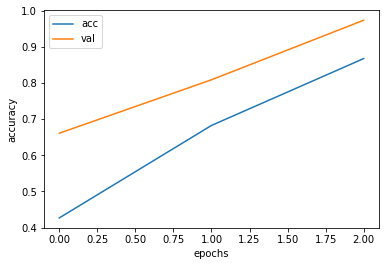

In [20]:
# 학습 정확도 시각화
plt.plot(history.history['accuracy'], label='acc')
plt.plot(history.history['val_accuracy'], label='val')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend();

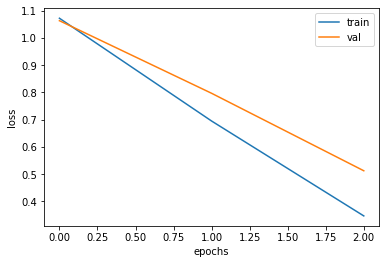

In [21]:
# 학습 정확도 시각화 (loss)
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend();

# 5. Test 데이터 준비

In [22]:
# x_test, y_test를 만드는 방법은 x_train, y_train을 만드는 방법과 아주 유사합니다.
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/scissor"
resize_images(image_dir_path)

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/rock"
resize_images(image_dir_path)

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/paper"
resize_images(image_dir_path)

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test"
(x_test, y_test)=load_data(image_dir_path)
x_test_norm = x_test/255.0   # 입력은 0~1 사이의 값으로 정규화
print("x_test shape: {}".format(x_test.shape))
print("y_test shape: {}".format(y_test.shape))

100  images to be resized.
100  images resized.
100  images to be resized.
100  images resized.
100  images to be resized.
100  images resized.
학습데이터(x_train)의 이미지 개수는 300 입니다.
x_test shape: (300, 64, 64, 3)
y_test shape: (300,)


In [23]:
# model을 학습시키는 코드를 직접 작성해 보세요.
# Hint! model.evaluate()을 사용해 봅시다.
test_loss, test_accuracy = model.evaluate(x_test_norm,y_test, verbose=2)
print(f"test_loss: {test_loss}")
print(f"test_accuracy: {test_accuracy}")

10/10 - 1s - loss: 1.0665 - accuracy: 0.3667
test_loss: 1.0665416717529297
test_accuracy: 0.36666667461395264


# 6. 틀린 문제 분석

In [24]:
predicted_result = model.predict(x_test_norm)
predicted_labels = np.argmax(predicted_result, axis=1)

예측확률분포: [0.31049928 0.32123402 0.36826673]
라벨: 1, 예측결과: 2


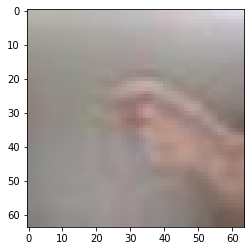

예측확률분포: [0.29909414 0.37096882 0.329937  ]
라벨: 0, 예측결과: 1


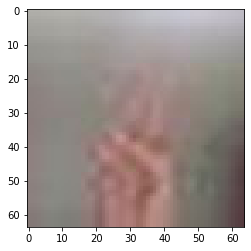

예측확률분포: [0.2846766 0.3404345 0.3748889]
라벨: 0, 예측결과: 2


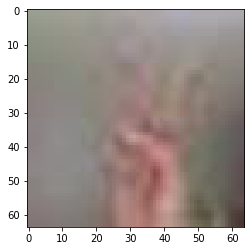

예측확률분포: [0.29375732 0.29368043 0.4125623 ]
라벨: 0, 예측결과: 2


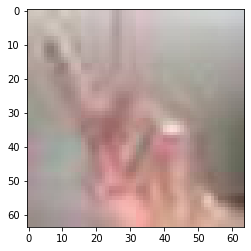

예측확률분포: [0.24314573 0.3045526  0.4523016 ]
라벨: 1, 예측결과: 2


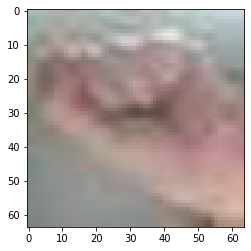

In [25]:
import random
wrong_predict_list=[]
for i, _ in enumerate(predicted_labels):
    # i번째 test_labels과 y_test이 다른 경우만 모아 봅시다. 
    if predicted_labels[i] != y_test[i]:
        wrong_predict_list.append(i)

# wrong_predict_list 에서 랜덤하게 5개만 뽑아봅시다.
samples = random.choices(population=wrong_predict_list, k=5)

for n in samples:
    print("예측확률분포: " + str(predicted_result[n]))
    print("라벨: " + str(y_test[n]) + ", 예측결과: " + str(predicted_labels[n]))
    plt.imshow(x_test[n], cmap=plt.cm.binary)
    plt.show()

In [26]:
predicted_labels

array([2, 2, 1, 2, 1, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 1, 2, 2, 2, 2, 2, 1,
       2, 2, 1, 2, 2, 0, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 1,
       2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 1, 1, 2,
       2, 1, 2, 1, 2, 2, 2, 0, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 0, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1,
       1, 1, 2, 1, 1, 1, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2,
       2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2,
       2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 1, 2,
       2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [27]:
y_test[wrong_predict_list]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int32)

In [28]:
predicted_result = model.predict(x_test_norm) # model이 추론한 확률값. 
predicted_labels = np.argmax(predicted_result, axis=1)

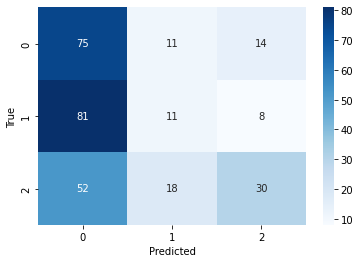

In [29]:
from sklearn.metrics import confusion_matrix 
import seaborn as sns 
predicted_result = model.predict(x_test) 

# model이 추론한 확률값. 
predicted_labels = np.argmax(predicted_result, axis=1) 
cm = confusion_matrix(y_test,predicted_labels) 
sns.heatmap(cm, annot=True, cmap='Blues') 
plt.xlabel('Predicted') 
plt.ylabel('True') 
plt.show()

# 회고
배운 점
1. 기본적인 CNN 모델링을 실습할 수 있어서 도움이 되었다.
2. validation을 수행하고 그래프로 시각화하였다.
3. dropout, 다양한 데이터확보, 정규화 등 작업으로 오버피팅을 최대한 피하고자 하였다.

아쉬운 점
1. train/validation을 수행하고 그래프를 확인할 때, validation이 높게 나오는 경우가 있는데 해석이 잘 안되었다.
2. 진행하다보니 파일 정리가 어려웠다.
3. 특정 클래스만 예측하는 경우 - 0만 예측하거나 1,2만 예측하는 경우 - 가 자주 발생하였다.
4. 정확도가 40%을 넘지 않은 점이 아쉬웠다.

느낀 점
1. 인풋 데이터를 잘 수집하고 정제하는 것의 중요성을 느꼈다.
2. 데이터가 많아지면서 관리하기가 어려웠다. 실제 데이터를 다룰 때 이 부분을 주의해야 할 것 같다.